In [1]:
import pandas as pd
import os
from bidi.algorithm import get_display
import re
import multiprocessing

In [2]:
import pickle

In [3]:
file_type = 'post'

In [4]:
field_name = 'message'

In [5]:
threads_df = pd.read_csv(f'{file_type}.csv')

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df = threads_df[threads_df['date'].notna()]

In [7]:
df = df.loc[~df['date'].str.contains('post')]

In [8]:
df.loc[df['date'].str.contains('post')]

,Unnamed: 0,thread_id,post_id,user_name,date,message,cite1,cite2,cite3,cite4


In [9]:
threads_df = df

In [10]:
threads_df['timestamp'] = pd.to_datetime(df['date'])

In [11]:
dataset = threads_df.drop_duplicates(subset=['thread_id','post_id','user_name','message','timestamp'], keep=False)

In [12]:
dataset['year'] = dataset.timestamp.dt.year
dataset['month'] = dataset.timestamp.dt.month
dataset['day'] = dataset.timestamp.dt.day
dataset['hour'] = dataset.timestamp.dt.hour
dataset['day_of_week_name'] = dataset.timestamp.dt.weekday_name
dataset['quarter'] = dataset.timestamp.dt.quarter

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [20]:
dataset['year'].value_counts()

2019    187255
2020    114001
2018      3592
2017       354
2016        70
2013         5
2015         3
2011         1
2010         1
Name: year, dtype: int64

In [13]:
dataset['quarter'].value_counts()

3    80468
1    76825
4    75944
2    72045
Name: quarter, dtype: int64

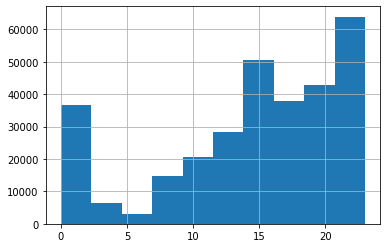

In [21]:
dataset['hour'].hist()

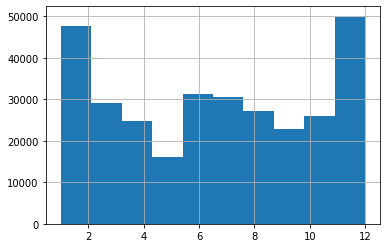

In [15]:
dataset['month'].hist()

In [16]:
dataset['timestamp'].min()

Timestamp('2010-09-08 22:01:00')